In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def activity_plot(data=None,name=None):
    plt.style.use('ggplot')
    x = data.index
    y = data
    plt.figure(dpi=500,figsize=[15,5])
    plt.title(name)
    plt.xlim(pd.Timestamp(2017,11,24),pd.Timestamp(2017,12,3))
    plt.plot(x,y)
    plt.savefig(name+'.jpg')

In [3]:
# 活跃度绘图
def activity(test=True):
    if test == True:
        df = pd.read_csv('df1.csv')
        df = df.head(10240)
    else:
        df = pd.read_csv('processed.csv') #read processed df
        df = df.drop('Unnamed: 0', axis=1)
        print(df.info())
    print(df.action.unique())
    df['time'] = pd.to_datetime([i.split(' ')[0] for i in df.time])
    df = df.groupby('time')['uid'].agg('count')
    activity_plot(data=df,name='Activities')

    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100150807 entries, 0 to 100150806
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   uid     int64 
 1   gid     int64 
 2   cid     int64 
 3   action  object
 4   time    object
dtypes: int64(3), object(2)
memory usage: 3.7+ GB
None
['pv' 'fav' 'buy' 'cart']


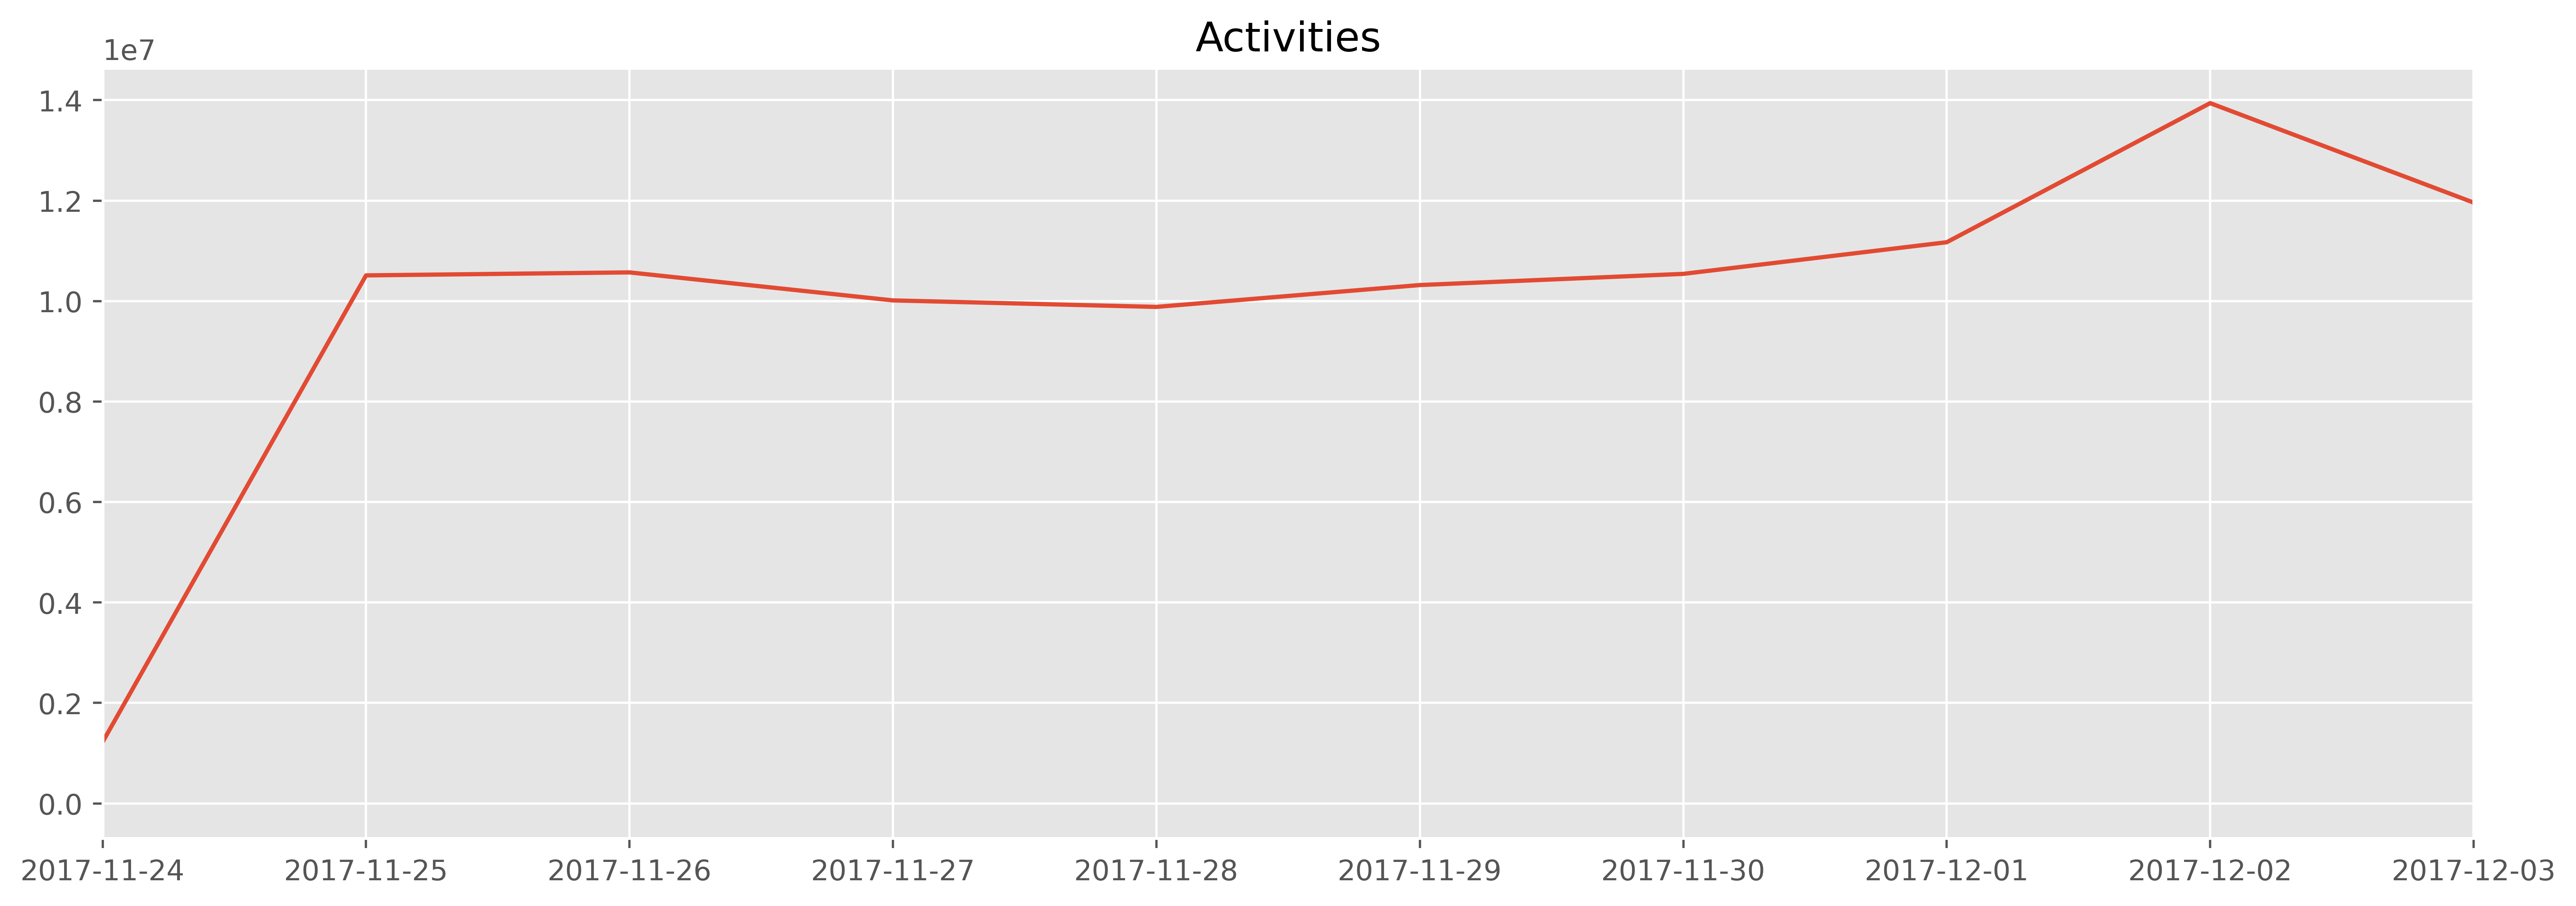

In [4]:
activity(False)


In [5]:
# 增长新客统计
def new_user(test=True):
    if test == True:
        df = pd.read_csv('df1.csv')
        df = df.head(1024)
    else:
        df = pd.read_csv('processed.csv') #read processed df
        df = df.drop('Unnamed: 0', axis=1)
        print(df.info())
    # 筛选行为
    df = df.loc[df['action']=='buy']
    df['time'] = [i.split(' ')[0] for i in df.time]
    df['time'] =pd.to_datetime(df['time'])
    # 取第一次并统计
    df = df.groupby('uid').agg('min')
    df = df.groupby('time').agg('count')
    activity_plot(data=df,name='New Users')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100150807 entries, 0 to 100150806
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   uid     int64 
 1   gid     int64 
 2   cid     int64 
 3   action  object
 4   time    object
dtypes: int64(3), object(2)
memory usage: 3.7+ GB
None


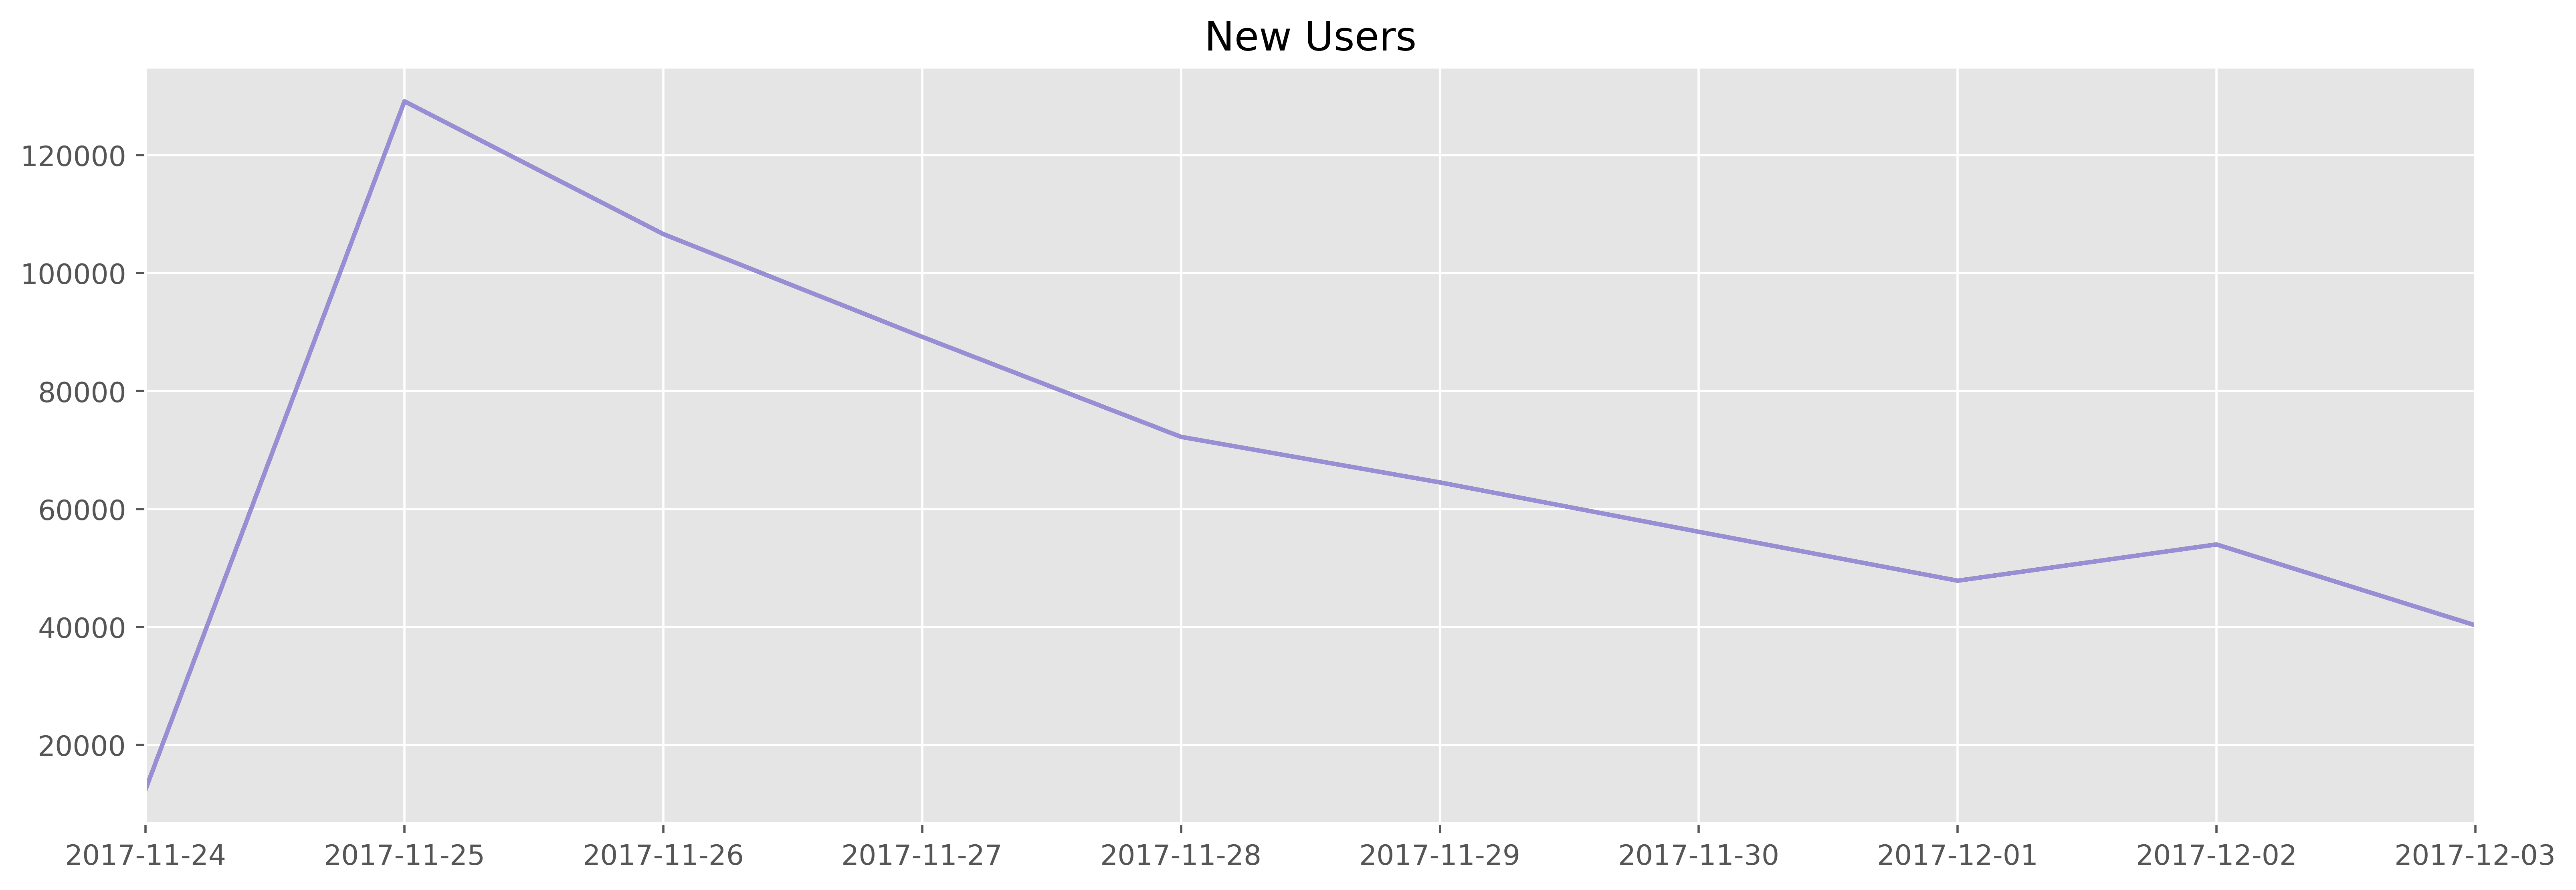

In [6]:
new_user(False)

In [16]:
from pyecharts import options as opts
from pyecharts.charts import Funnel
# 漏斗图
def funnel_plot(data=None,name=None):
    c = (
        Funnel()
        .add(name, [list(z) for z in zip(['pv','cart','fav','buy'],data)])
        .set_global_opts(title_opts=opts.TitleOpts(title=name+"_funnel"))
        .render(name+".html")
    )

In [14]:
# 行为统计

def action_stats(test=True):
    result=[]
    action_types = ['pv','cart','fav','buy']
    if test == True:
        df = pd.read_csv('df1.csv')
        df = df.head(1024)
    else:
        df = pd.read_csv('processed.csv') #read processed df
        df = df.drop('Unnamed: 0', axis=1)
    # 不作处理
    for action in action_types:
        result.append(len(df.loc[df['action']==action]))
    funnel_plot(data=result,name='unprocessed')
    result=[]
    # 多次行为统计为一次
    df = df[['uid','action']].drop_duplicates()
    for action in action_types:
        result.append(len(df.loc[df['action']==action]))
    funnel_plot(data=result,name='processed')
    

In [18]:
action_stats(False)

In [41]:
# 跳失率
def jumpoff_rate(test=True):
    if test == True:
        df = pd.read_csv('df1.csv')
        df = df.head(1024)
    else:
        df = pd.read_csv('processed.csv') #read processed df
        df = df.drop('Unnamed: 0', axis=1)
    df['time'] = pd.to_datetime([i.split(' ')[0] for i in df.time])
    # 总访问量
    all_customer = df.groupby('time')['uid'].agg('count')
    # 跳失用户量
    df = df.groupby(['time','uid']).agg('count')
    df = df.loc[df['gid']==1]
    df = df.reset_index()
    df = df.groupby('time')['gid'].agg('count')
    df = pd.concat([df, all_customer], axis=1)
    df = df.fillna(0)
    # 计算并绘图
    plt.style.use('ggplot')
    data = df['gid']/df['uid']
    name='Jumpoff Rate'
    x = data.index
    y = data
    plt.figure(dpi=500,figsize=[15,5])
    plt.title(name)
    plt.xlim(pd.Timestamp(2017,11,24),pd.Timestamp(2017,12,3))
    plt.ylim(0,0.1)
    plt.plot(x,y)
    plt.savefig(name+'.jpg')
    

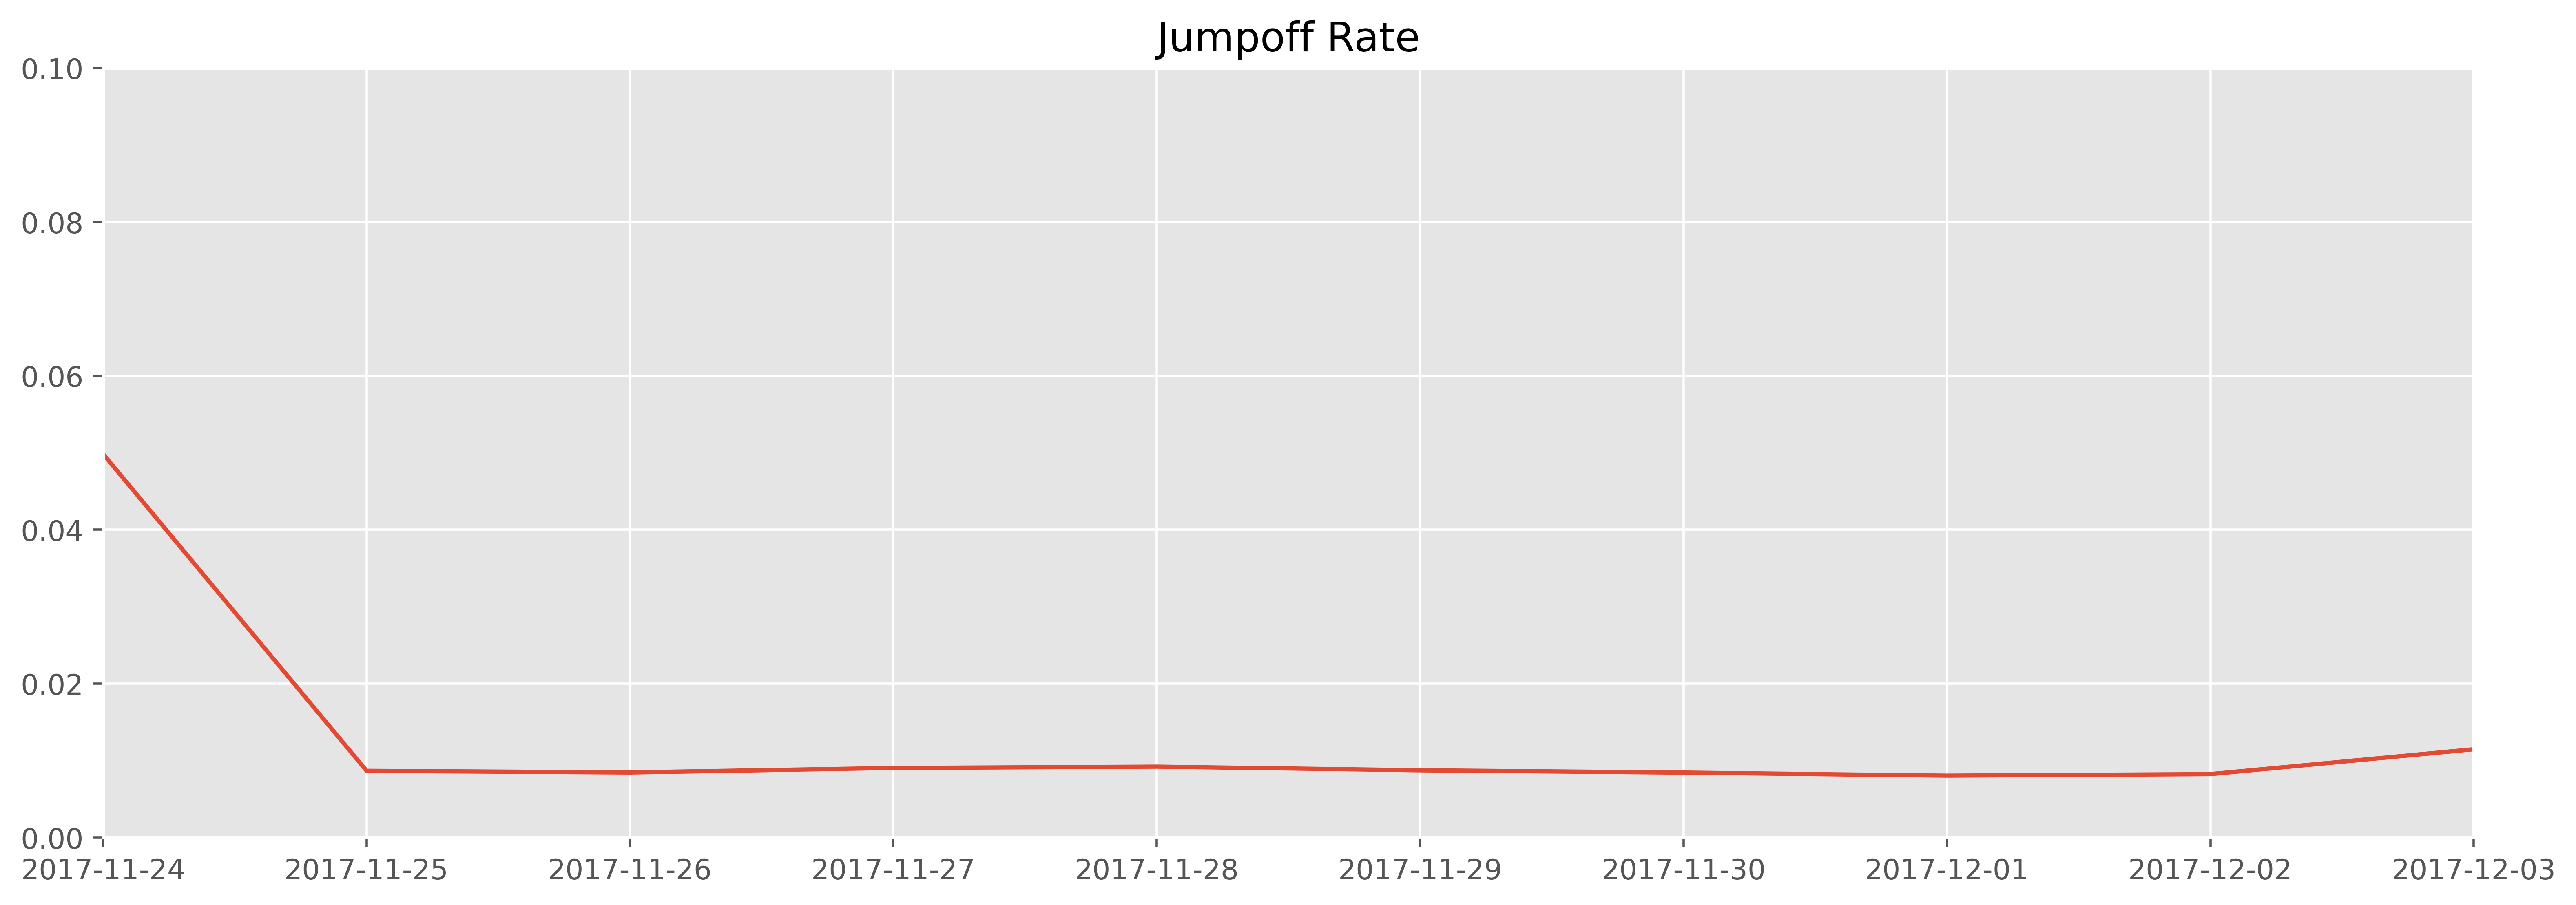

In [42]:
jumpoff_rate(False)